In [2]:
import pandas as pd
import numpy as np

In [3]:
# !python -m pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

In [28]:
demand_history = pd.read_csv("dataset/Biomass_History.csv")
demand_history.head()

Index  Latitude  Longitude       2010       2011       2012       2013   
0      0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070  \
1      1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2      2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3      3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4      4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   

        2014       2015       2016        2017  
0  10.788374   6.647325   7.387925    5.180296  
1  34.419411  27.361908  40.431847   42.126945  
2  70.917908  42.517117  59.181629   73.203232  
3  93.513924  70.203171  74.536720  101.067352  
4  19.534035  19.165791  16.531315   26.086885

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adfuller(demand_history.iloc[0][3:])

(-2.8939303316044955,
 0.046058383726039966,
 0,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 23.087836696094037)

In [15]:
years = demand_history.columns[3:]

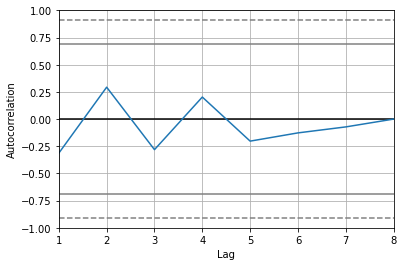

In [16]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(demand_history.iloc[0][3:])
plt.show()

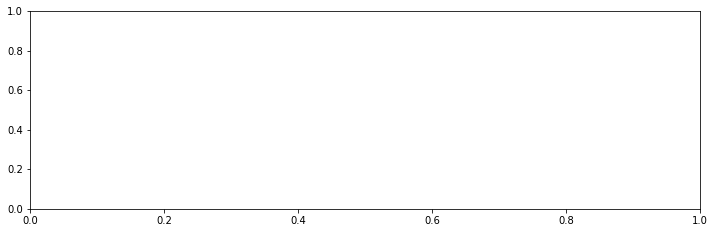

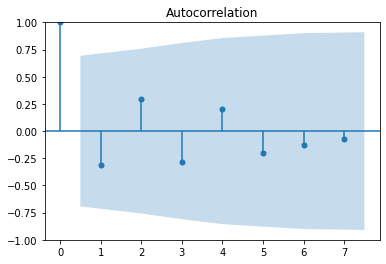

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(demand_history.iloc[0][3:])

In [18]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(demand_history.iloc[0][3:],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    8
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -14.390
Date:                Sat, 05 Aug 2023   AIC                             34.781
Time:                        20:24:06   BIC                             34.619
Sample:                    01-01-2010   HQIC                            32.775
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6004      0.438     -1.372      0.170      -1.458       0.258
ma.L1         -0.2931      0.552     -0.531      0.596      -1.376       0.790
sigma2         3.1602      2.780      1.137      0.256      -2.288       8.609
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.37   Prob(JB):                         0.77
Heteroskedasticity (H):              21.16   Skew:                             0.25
Prob(H) (two-sided):                  0.09   Kurtosis:                         1.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model_fit.predict(start=0,end=8)

2010-01-01    0.000000
2011-01-01    8.475700
2012-01-01    8.581490
2013-01-01    8.828210
2014-01-01    8.750973
2015-01-01    7.330130
2016-01-01    9.333861
2017-01-01    7.513678
2018-01-01    7.189813
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(demand_history.iloc[0][3:],model_fit.predict(start=0,end=7))

32.28600410804936

In [21]:
demand_history[2018] = 0
demand_history[2019] = 0

In [23]:
model_fit.predict(start=7,end=9)

2017-01-01    7.513678
2018-01-01    7.189813
2019-01-01    5.983251
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [26]:
demand_history.loc[2018,0],demand_history.loc[2019,0] = model_fit.predict(start=9,end=10).iloc[0],model_fit.predict(start=9,end=10).iloc[1]

In [36]:
demand_history.loc[0,2018] = model_fit.predict(start=9,end=10).iloc[0]

In [37]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013  \
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017      2018    2019   0  
0     10.788374   6.647325   7.387925    5.180296  5.983251  6.7077 NaN  
1     34.419411  27.361908  40.431847   42.126945  0.000000  0.0000 NaN  
2     70.917908  42.517117  59.181629   73.203232  0.000000  0.0000 NaN  
3     93.513924  70.203171  74.536720  101.067352  0.000000  0.0000 NaN  
4     19.534035  19.165791  16.531315   26.086885  0.000000  0.0000 NaN  
...         ...        ...        ...         ...       ...     ...  ..  
2413   5.113997   5.301668   6.419223    5.321604  0.000000  0.0000 NaN  
2414   0.121749   0.122467   0.145785    0.120626  0.000000  0.0000 NaN  
2415   0.039241   0.039473   0.046989    0.038879  0.000000  0.0000 NaN  
2416   1.316443   1.324201   1.576338    1.304297  0.000000  0.0000 NaN  
2417   0.229067   0.230417   0.274289    0.226953  0.000000  0.0000 NaN  

[2418 rows x 14 columns]

In [38]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
demand_history.loc[0,2018],demand_history.loc[0,2018] = model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

In [39]:
model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

(7.51367752099229, 5.9832506877330065)

In [40]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
for i in range(len(demand_history)):
    model=ARIMA(demand_history.iloc[i][3:],order=(1,1,1))
    model_fit=model.fit()
    demand_history.loc[i,2018],demand_history.loc[i,2019] = model_fit.predict(start=7,end=8).iloc[0],model_fit.predict(start=8,end=9).iloc[1]

c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\apr\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and 

In [41]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013  \
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017       2018       2019   0  
0     10.788374   6.647325   7.387925    5.180296   7.483670   5.837380 NaN  
1     34.419411  27.361908  40.431847   42.126945  47.519392  -5.522590 NaN  
2     70.917908  42.517117  59.181629   73.203232  57.071377  23.667258 NaN  
3     93.513924  70.203171  74.536720  101.067352  74.989417  31.017123 NaN  
4     19.534035  19.165791  16.531315   26.086885  17.522164   8.424259 NaN  
...         ...        ...        ...         ...        ...        ...  ..  
2413   5.113997   5.301668   6.419223    5.321604   7.138430  -0.167584 NaN  
2414   0.121749   0.122467   0.145785    0.120626   0.150970  -0.028169 NaN  
2415   0.039241   0.039473   0.046989    0.038879   0.048699  -0.009184 NaN  
2416   1.316443   1.324201   1.576338    1.304297   1.700111  -0.599753 NaN  
2417   0.229067   0.230417   0.274289    0.226953   0.299213  -0.138833 NaN  

[2418 rows x 14 columns]

In [40]:
! python -m pip install prophet


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!pip install prophet --no-binary :all:


[notice] A new release of pip is available: 23.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
demand_history.to_csv('forecast_arima_2018-19.csv',index=False)

In [57]:
demand_history = pd.read_csv('forecast_arima_2018-19.csv')

In [58]:
demand_history

Index  Latitude  Longitude       2010       2011       2012       2013   
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070  \
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017       2018       2019   0  
0     10.788374   6.647325   7.387925    5.180296   7.483670   5.837380 NaN  
1     34.419411  27.361908  40.431847   42.126945  47.519392  -5.522590 NaN  
2     70.917908  42.517117  59.181629   73.203232  57.071377  23.667258 NaN  
3     93.513924  70.203171  74.536720  101.067352  74.989417  31.017123 NaN  
4     19.534035  19.165791  16.531315   26.086885  17.522164   8.424259 NaN  
...         ...        ...        ...         ...        ...        ...  ..  
2413   5.113997   5.301668   6.419223    5.321604   7.138430  -0.167584 NaN  
2414   0.121749   0.122467   0.145785    0.120626   0.150970  -0.028169 NaN  
2415   0.039241   0.039473   0.046989    0.038879   0.048699  -0.009184 NaN  
2416   1.316443   1.324201   1.576338    1.304297   1.700111  -0.599753 NaN  
2417   0.229067   0.230417   0.274289    0.226953   0.299213  -0.138833 NaN  

[2418 rows x 14 columns]

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
# !pip install seaborn

2010


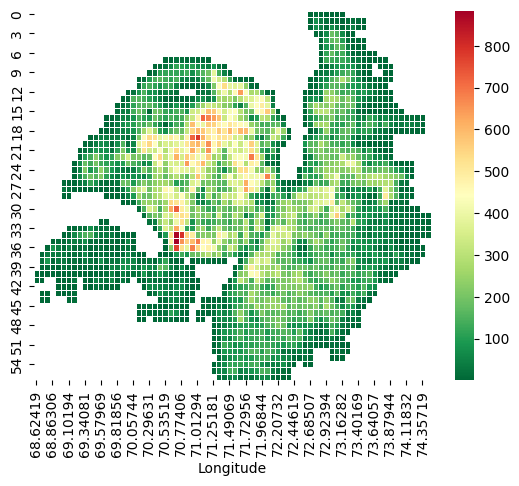

2011


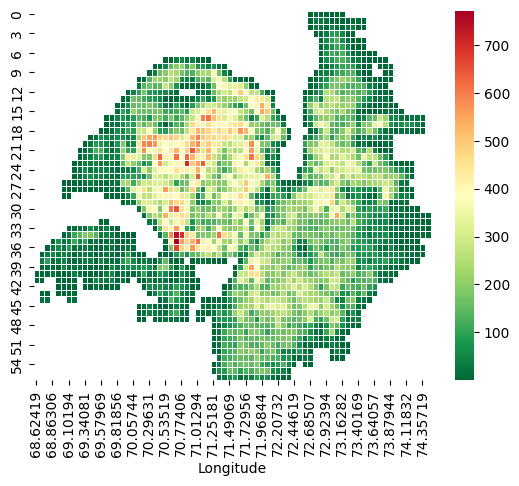

2012


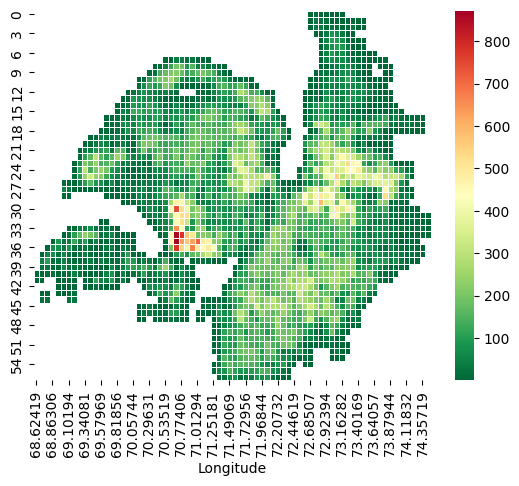

2013


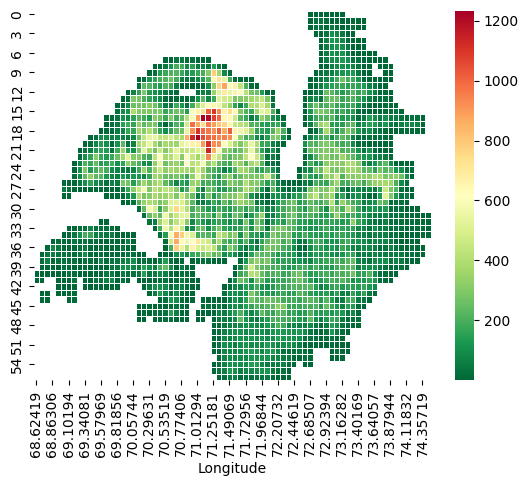

2014


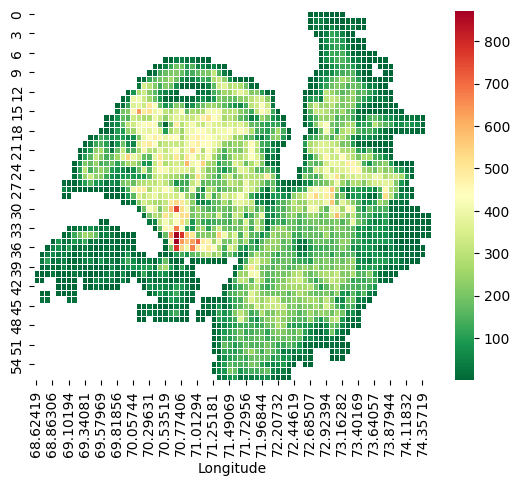

2015


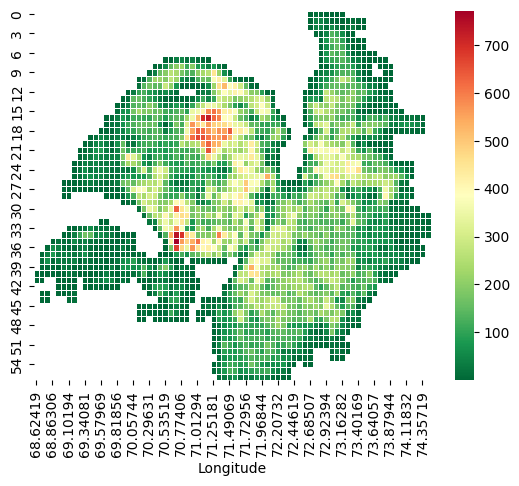

2016


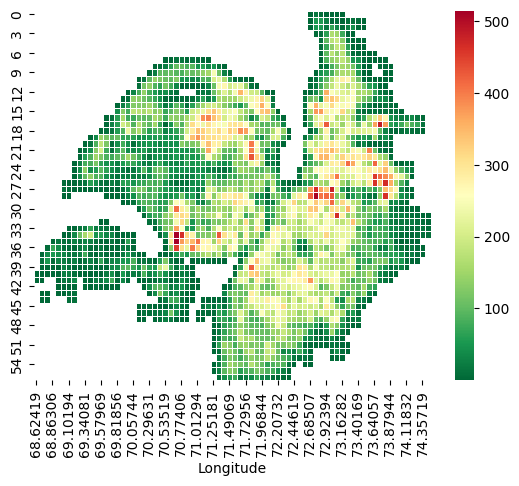

2017


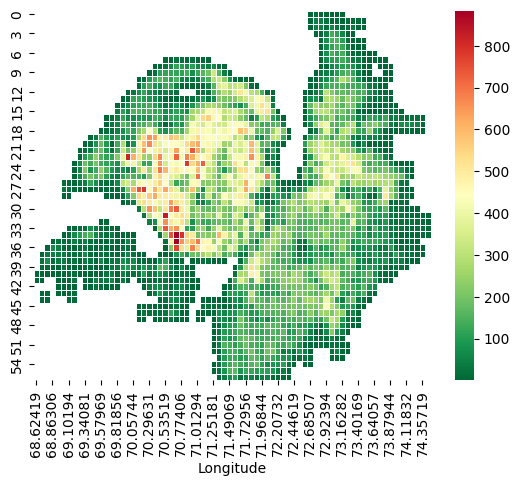

2018


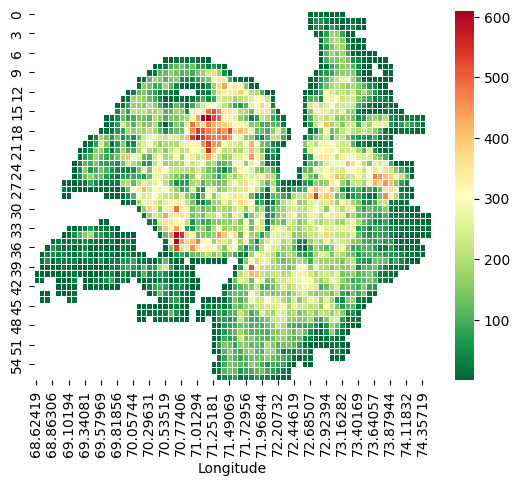

2019


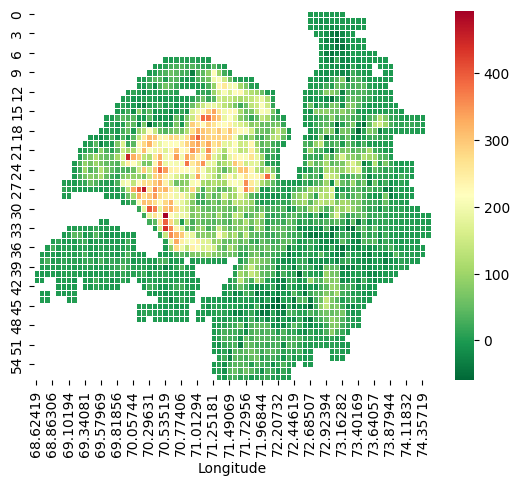

In [61]:
years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
for year in years:
    print(year)
    temp  = demand_history[['Latitude','Longitude',year]].pivot(index='Latitude', columns='Longitude', values=year).reset_index()
    del temp['Latitude']
    sns.heatmap(temp, cmap='RdYlGn_r', linewidths=0.5)
    plt.show()

In [62]:
demand_history.iloc[10][3:11]

2010     8.916524
2011    16.679886
2012    21.618805
2013    13.550439
2014    15.403367
2015     7.133225
2016     7.732000
2017     9.861409
Name: 10, dtype: float64

In [211]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import time 
def fb_forecast(data):
# Initialize and fit the Prophet model
    s= time.time()
    model = Prophet()
    model.fit(data)
#     print(data)
    # Create a dataframe for future dates (next two years)
    future = model.make_future_dataframe(periods=2,freq='A')  # 365 days/year * 2 years

    # Make predictions for the future dates
    forecast = model.predict(future)
    print(time.time()-s)
    return forecast['yhat'][9], forecast['yhat'][10]
    # Plot the forecast
#     fig = model.plot(forecast)
#     plt.title(f'Biomass Production Forecast for Latitude {latitude}, Longitude {longitude}')
#     plt.xlabel('Date')
#     plt.ylabel('Biomass Production')
#     plt.show()

    # Access the forecasted values for the next two years
#     forecast_next_two_years = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(730)  # Last 730 rows are the forecast

    # Save the forecast to a CSV file
#     forecast_next_two_years.to_csv('biomass_forecast.csv', index=False)


In [199]:
data = demand_history.copy()

In [200]:
# del data['Index']

In [201]:
latitude = 24.66818
longitude =	71.33144

In [202]:
data = data[(data['Latitude'] == latitude) & (data['Longitude'] == longitude)].T 

In [203]:
data['ds'] = data.index

In [204]:
data = data.rename(columns={0:'y'})

In [205]:
model = Prophet()
model.fit(data[2:11])

# Create a dataframe for future dates (next two years)
future = model.make_future_dataframe(periods=2,freq='A')

12:39:00 - cmdstanpy - INFO - Chain [1] start processing
12:39:00 - cmdstanpy - INFO - Chain [1] done processing


In [206]:
forecast = model.predict(future)
forecast['yhat']

0     8.644152
1     8.899966
2     9.081739
3     7.254654
4     7.583887
5     7.839701
6     8.021473
7     6.194388
8     6.523622
9     8.118209
10    8.000118
Name: yhat, dtype: float64

In [207]:
fb_forecast(data[2:11])

12:39:02 - cmdstanpy - INFO - Chain [1] start processing
12:39:02 - cmdstanpy - INFO - Chain [1] done processing


(8.118208723195954, 8.000118175668364)

In [ ]:
forecast_2018 = []
forecast_2019 = []

for i, row in demand_history.iterrows():
    lat, long = row['Latitude'], row['Longitude']
    temp = pd.DataFrame(row[2:11])
    temp['ds'] = pd.to_datetime(temp.index)
    temp = temp.rename(columns={i: 'y'})
    
    forecast_2018_i, forecast_2019_i = fb_forecast(temp)
    
    forecast_2018.append(forecast_2018_i)
    forecast_2019.append(forecast_2019_i)

data['2018'] = forecast_2018
data['2019'] = forecast_2019


0.27695751190185547
0.30521178245544434
0.2851574420928955
0.2803177833557129
0.2734198570251465
0.28406763076782227
0.2660331726074219
0.28098344802856445
0.2647278308868408
0.2850613594055176
0.2963869571685791
0.32858991622924805
0.2848491668701172
0.28200507164001465
0.26607584953308105
0.26628994941711426
0.29666924476623535
0.2675604820251465
0.274975061416626
0.28701114654541016
0.28287410736083984
0.2593557834625244
0.2868766784667969
0.2576019763946533
0.2668929100036621
0.27793431282043457


In [216]:
data[:1].apply(lambda row: fb_forecast(temp), axis=1, result_type='expand')


0.31029272079467773


0         1
Latitude  8.118209  8.000118

In [215]:
data

typing.Literal[<no_default>]          y         ds        2018        2019   
Latitude                      24.668180   Latitude         NaN         NaN  \
Longitude                     71.331440  Longitude         NaN         NaN   
2010                           8.475744       2010         NaN         NaN   
2011                           8.868568       2011         NaN         NaN   
2012                           9.202181       2012         NaN         NaN   
...                                 ...        ...         ...         ...   
1626                                NaN        NaN   13.000722   -6.525553   
1627                                NaN        NaN  -29.928129  -70.529795   
1628                                NaN        NaN  -88.273820 -156.014868   
1629                                NaN        NaN -242.557042 -393.524189   
1630                                NaN        NaN -108.995643 -201.141617   

typing.Literal[<no_default>]      2018      2019  
Latitude                      8.118209  8.000118  
Longitude                     8.118209  8.000118  
2010                          8.118209  8.000118  
2011                          8.118209  8.000118  
2012                          8.118209  8.000118  
...                                ...       ...  
1626                               NaN       NaN  
1627                               NaN       NaN  
1628                               NaN       NaN  
1629                               NaN       NaN  
1630                               NaN       NaN  

[1644 rows x 6 columns]